# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

***Описание данных***

Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.

Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Откроем файл и запишем датасет в переменную data
try:
    data = pd.read_csv('/datasets/insurance.csv')
except:
    data = pd.read_csv('insurance.csv')

In [3]:
# Посмотрим первые 10 строк датафрейма data
data.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [4]:
# Выведем общую информацию о датафрейме data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


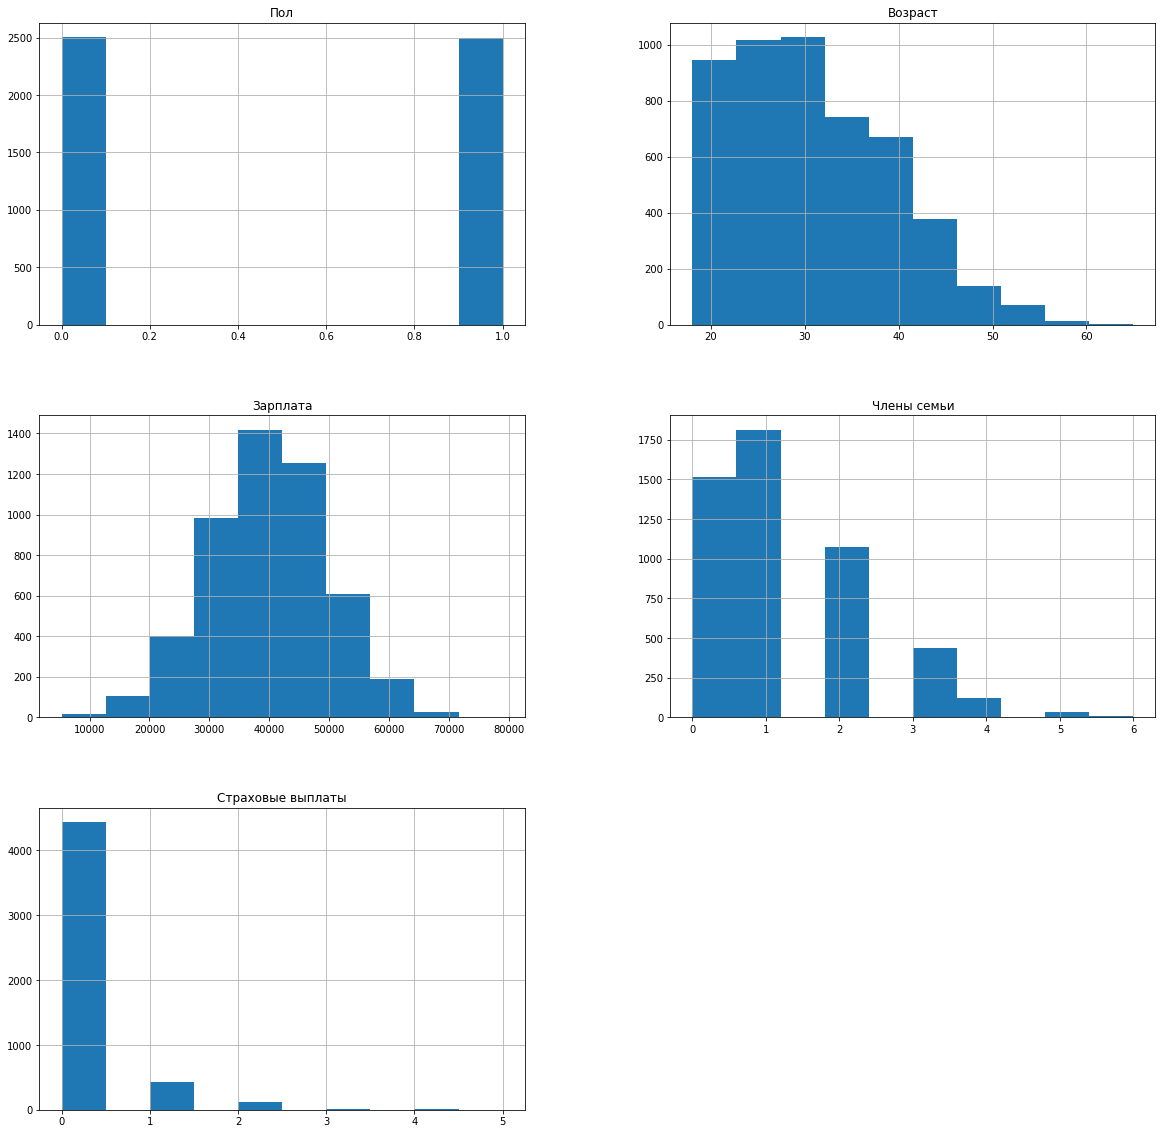

In [6]:
# Построим общую гистограмму для всех числовых столбцов таблицы
data.hist(figsize=(20, 20))
plt.show()

***Вывод:*** Файл содержит 5000 записей. Количество значений в столбцах совпадает, что говорит о том, что нет пропущенных значений.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** 

Качество линейной регрессии не изменится.

**Обоснование:**

Представим новую матрицу признаков $Z$ как произведение матрицы $X$ на матрицу $P$ (обратимую):

$$Z=XP$$

Подставим новое значение $Z$ в формулу $w′$  и произведем преобразования:

$$w_1 = ( (XP)^TXP)^{−1}(XP)^Ty = (P^TX^TXP)^{−1}P^TX^Ty = (P^T(X^TX)P)^{−1}P^TX^Ty = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty$$

Так как $P$ по условию обратимая, то произведение $(P^T)^{-1}P^T$ равно $E$ (единичная матрица):

$$w_1 = P^{-1}(X^TX)^{-1}EX^Ty = P^{-1}(X^TX)^{-1}X^Ty$$

Выражение $(X^TX)^{-1}X^Ty$ равно $w$:

$$w_1 = P^{-1}(X^TX)^{-1}X^Ty = P^{-1}w$$

Подставим новое значение весов $𝑤_1$ в формулу для предсказаний линейной регрессии. Предсказания модели расчитываются по формуле:

$$a = Xw$$

Подставим в эту формулу значения $Z$ и $w_1$ для того, чтобы на их основе вычислить предсказания модели $a_1$:

$$a_1 =Zw_1 = XPP^{-1}w$$

Так как $P$ по условию обратимая, то произведение $PP^{-1}$ равно $E$:

$$a_1 = XPP^{-1}w = XEw = Xw = a$$

Предсказания $a_1$ для матрицы признаков, умноженной на обратимую матрицу $P$ равны предсказаниям a.

Таким образом, умножение исходных признаков на обратимую матрицу не изменит предсказания модели.

***Вывод:*** умножение исходных признаков на обратимую матрицу не изменит предсказания модели.

## Алгоритм преобразования

**Алгоритм**

Умножим матрицу признаков на обратимую матрицу, которая будет генерироваться случайно.

**Обоснование**

Если умножить признаки тренировочной и тестовой выборок на одну и ту же обратимую матрицу, то результатом предсказания будет произведение изменённой таблицы с признаками на вектор, который был получен из этой же таблицы с изменёнными данными увеличенную на ту же величину, что и признаки тренировочных данных.

## Проверка алгоритма

In [7]:
# Выделим признаки
features = data.drop('Страховые выплаты',axis=1)
target = data['Страховые выплаты']

In [8]:
# Разделим датафрейм на обучающую и тестовую выборку
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [9]:
# Модель с исходными признаками
model = LinearRegression()
model.fit(features_train, target_train)
R2_original_data = r2_score(target_test, model.predict(features_test))
print("R2 =", R2_original_data)

R2 = 0.43522757127026546


In [10]:
# Создадим случайную матрицу-ключ
n = features.shape[1]
crypto_matrix = np.random.randint(1,10, (n,n))
# защищенные признаки
crypted_features = features @ crypto_matrix
np.linalg.inv(crypto_matrix)

array([[-0.5974026 ,  0.25974026,  0.20779221,  0.03896104],
       [ 0.72727273, -0.27272727, -0.48484848,  0.24242424],
       [ 0.35064935,  0.06493506, -0.28138528, -0.07359307],
       [-0.38961039,  0.03896104,  0.4978355 , -0.17748918]])

In [11]:
features.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


In [12]:
crypted_features.head()

,0,1,2,3
0,248339.0,347501.0,198735.0,446741.0
1,190375.0,266330.0,152370.0,342374.0
2,105232.0,147203.0,84232.0,189232.0
3,208682.0,292063.0,166972.0,375480.0
4,130728.0,182902.0,104629.0,235131.0


In [13]:
crypto_matrix

array([[4, 6, 5, 7],
       [8, 7, 8, 8],
       [5, 7, 4, 9],
       [7, 8, 2, 6]])

In [14]:
# Разделим датафрейм на обучающую и тестовую выборку
features_train, features_test, target_train, target_test = train_test_split(
    crypted_features, target, test_size=0.25, random_state=12345)

In [15]:
# Модель с защищенными признаками
model = LinearRegression()
model.fit(features_train, target_train)
R2_crypted_data = r2_score(target_test, model.predict(features_test))
print("R2 =", R2_crypted_data)

R2 = 0.4352275712702586


In [16]:
print('R2 - оригинальные данные','%.3f' % R2_original_data)
print('R2 - зашифрованные данные','%.3f' % R2_crypted_data)

R2 - оригинальные данные 0.435
R2 - зашифрованные данные 0.435


***Вывод:***

* Данные загружены и проанализированы.

* Разработан и применен алгоритм защиты персональных данных клиентов.

* Качество линейной регресии не изменилось (доказано математически, а также практическим путем).

